In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from PLDSA import heaps, zipf, entropy_seq, DFA

### Loading textual file

In [4]:
full_text = np.load('full_text.npy')

### Entropy

Sequential Entropy of the first $10^5$ elements (words) of the text 

In [5]:
full_text_entropy, _, _ = entropy_seq(full_text[:100000], norm=False, verbose=True)

100%|██████████| 100000/100000 [07:46<00:00, 214.42it/s]


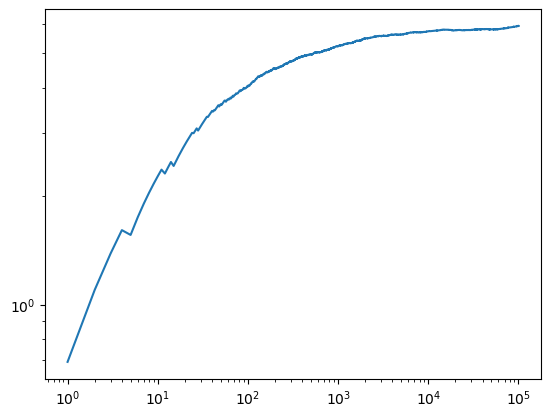

In [6]:
plt.plot(range(1, len(full_text_entropy)+1), full_text_entropy)
plt.yscale('log')
plt.xscale('log')

Normalized sequential Entropy of the first $10^5$ elements (words) of the text

In [7]:
full_text_entropy_norm, popt, y_fit = entropy_seq(full_text[:100000], norm=True, verbose=True,
                                                           fit=True, fr=None, to=None)

100%|██████████| 100000/100000 [07:38<00:00, 218.28it/s]


[-0.05567344  0.2431016 ]


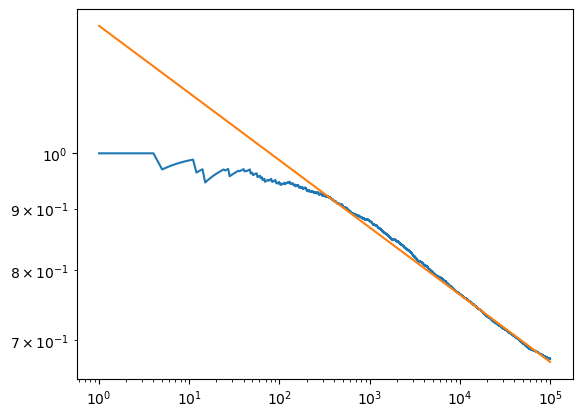

In [8]:
plt.plot(range(1, len(full_text_entropy_norm)+1), full_text_entropy_norm)
plt.plot(range(1, len(y_fit)+1), y_fit)
plt.yscale('log')
plt.xscale('log')
print(popt)

### Zipf's Law

Zipf's distribution of the full text

In [ ]:
zipf_seq, popt, y_fit = zipf(full_text, verbose=True, fit=True, fr=None, to=None)
plt.plot(zipf_seq)
plt.plot(y_fit)
plt.yscale('log')
plt.xscale('log')
print(popt)

Zipf's distribution of the full text evaluated from rank=10 to rank=10000

100%|██████████| 38336/38336 [00:00<00:00, 3006147.89it/s]


[-1.2823472  14.33854865]


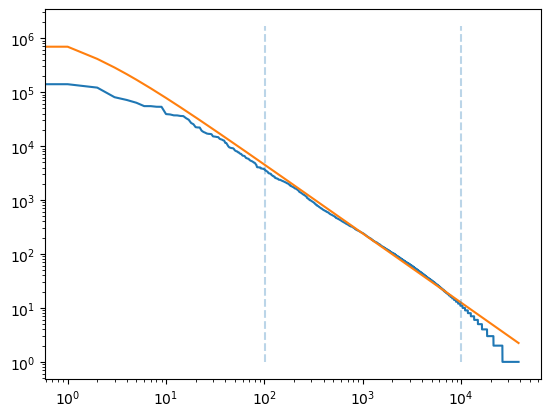

In [9]:
fr = 100
to = 10000
zipf_seq, popt, y_fit = zipf(full_text, verbose=True, fit=True, fr=fr, to=to)
plt.plot(zipf_seq)
plt.plot(y_fit)
plt.vlines(fr+1, 1, max(y_fit), linestyles='dashed', alpha=0.3)
plt.vlines(to+1, 1, max(y_fit), linestyles='dashed', alpha=0.3)
plt.yscale('log')
plt.xscale('log')
print(popt)


### Heaps' Law

Heaps' distribution on the full text

100%|██████████| 3128772/3128772 [00:01<00:00, 2211540.97it/s]


[0.52193789 2.71898391]


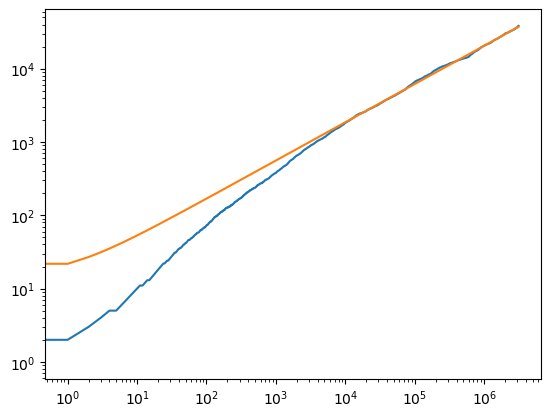

In [10]:
heaps_seq, popt, y_fit = heaps(full_text, verbose=True, fit=True, fr=None, to=None)
plt.plot(heaps_seq)
plt.plot(y_fit)
plt.yscale('log')
plt.xscale('log')
print(popt)

Heaps' distribution on the full text evaluated from the 10000th element

100%|██████████| 3128772/3128772 [00:01<00:00, 2207934.30it/s]


[0.51813284 2.7726528 ]


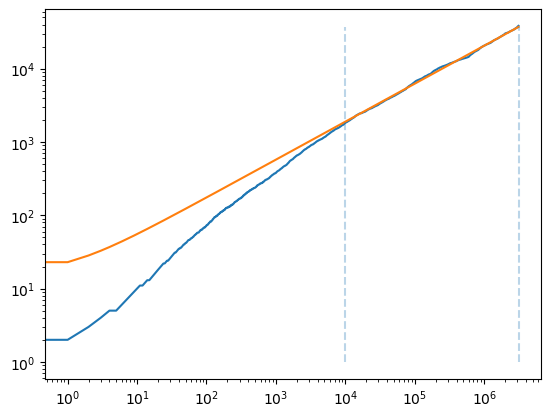

In [11]:
fr = 10000
to = None
heaps_seq, popt, y_fit = heaps(full_text, verbose=True, fit=True, fr=fr, to=to)
plt.plot(heaps_seq)
plt.plot(y_fit)
to = len(heaps_seq)
plt.vlines(fr+1, 1, max(y_fit), linestyles='dashed', alpha=0.3)
plt.vlines(to+1, 1, max(y_fit), linestyles='dashed', alpha=0.3)
plt.yscale('log')
plt.xscale('log')
print(popt)

### Detrended Fluctuation Analysis

DTA evaluated on the full text

In [12]:
L = [10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000,
     10000, 20000, 50000, 100000, 200000, 300000, 500000, 1000000]

FL, popt, y_fit = DFA(full_text, L, fit=True)

100%|██████████| 20/20 [07:22<00:00, 22.13s/it]  


array([ 0.74311425, -1.70788333])

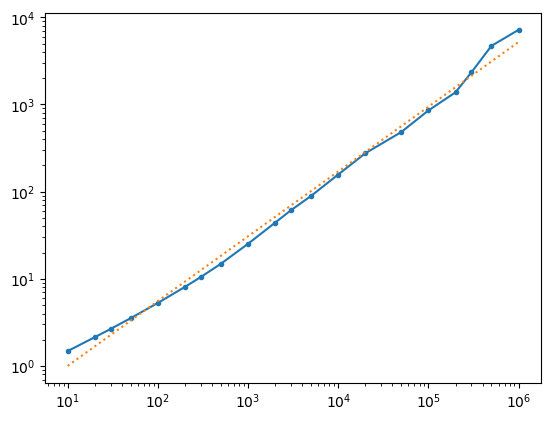

In [13]:
plt.plot(L, FL, '.-')
plt.plot(L, y_fit, ':')
plt.xscale('log')
plt.yscale('log')
popt